In [15]:
import tweepy
import csv
import pandas as pd
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
import os 
import pandas as pd
import os
import os
import pandas as pd
import numpy as np
import csv
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from collections import Counter
from string import punctuation
import nltk
from string import punctuation
from operator import itemgetter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import NMF, LatentDirichletAllocation
from nltk.tokenize import sent_tokenize, word_tokenize
ps = PorterStemmer()
import string 
from collections import Counter
from nltk import word_tokenize, pos_tag, pos_tag_sents
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
from datetime import datetime
datetime.utcnow()
####input your credentials here
consumer_key = 'w99pOAUdCATwkX4FNG1G5geNN'
consumer_secret = '8O2hMgDd3EFz3V5PvRXafFIVjGMUxkD7zU0d5ASK3DRgpzO9Ml'
access_token = '2835481326-Dg6K5CPl5GDITtshwzLzP8U9UpKjJf9szH2FOkE'
access_token_secret = '7E3hevW7w1WQTRdsoaWlv7dGQ9etbXdoIzkiKeD7ROLwO'

auth = OAuthHandler(consumer_key,consumer_secret)
api = tweepy.API(auth)
auth.set_access_token(access_token, access_token_secret)

In [2]:
tweet_topics = ["health"]

In [23]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)
csvFile = open('pos.csv', 'a')
csvFile1 = open('neg.csv', 'a')

#Use csv Writer
csvWriter = csv.writer(csvFile)
csvWriter1 = csv.writer(csvFile1)

followers_count = []
location = []
author_id = [] 
polarity = []
count = 0
endDate =   datetime(2016, 5, 25, 14, 10, 36, 30592)
for i in range(len(tweet_topics)):
    for tweet in tweepy.Cursor(api.search,q= ('love AND hate'),count=100,
                               lang="en",
                               since="2016-03-20").items():
        if tweet.created_at < endDate:
            count = count + 1
            followers_count.append(tweet.author.followers_count)
            location.append(tweet.author.location)
            author_id.append(tweet.author.id)
            sentiment = TextBlob(tweet.text)
            polarity.append(sentiment.sentiment.polarity)
            print(tweet.text)
            if sentiment.sentiment.polarity > 0:
                csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])
            elif sentiment.sentiment.polarity < 0:
                csvWriter1.writerow([tweet.created_at, tweet.text.encode('utf-8')])

TweepError: Failed to send request: ('Connection aborted.', OSError("(10054, 'WSAECONNRESET')",))

In [25]:
tweet.created_at

tweet.created_at 

datetime.datetime(2018, 7, 3, 0, 7, 32)

In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize
positive = pd.read_csv('pos.csv', header=None)
negative = pd.read_csv('neg.csv', header=None)

positive[1] = positive[1].str.replace('http\S+|www.\S+', '', case=False)
positive[1] = positive[1].str.replace('b', '', case=False)
positive[1] = positive[1].str.replace('RT', '', case=False)

negative[1] = negative[1].str.replace('http\S+|www.\S+', '', case=False)
negative[1] = negative[1].str.replace('b', '', case=False)
negative[1] = negative[1].str.replace('RT', '', case=False)

positive_no_pun = positive[1].str.replace('[^\w\s]','')
negative_no_pun = negative[1].str.replace('[^\w\s]','')

#data = pd.concat([positive_no_pun,negative_no_pun])
data = positive_no_pun

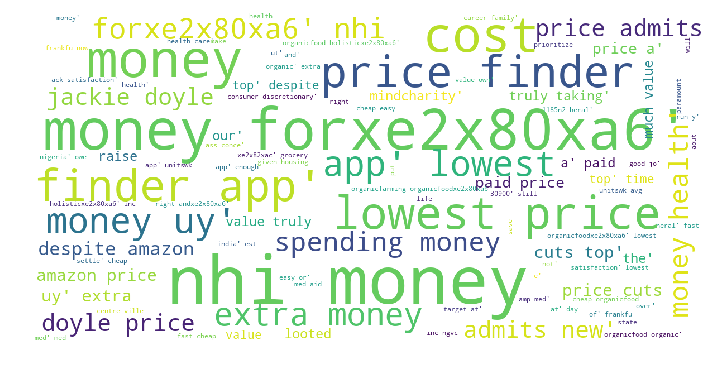

In [10]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(text_data)

In [6]:
money_temp_polarity = []
text_data = []
for i in range(len(data)):
    tags = data.iloc[i].lower() 
    tokenized = word_tokenize(tags)
    for i, item in enumerate(tokenized):
        if (item == "money" or item == "price" or item == "value" or item == "cheap" or item == "cost"):
            if (i-2 > 0 and i+2 < len(tokenized)):
                listtemp = tokenized[i-2:i+3]
                place_review = " ".join(listtemp)
                text_data.append(place_review)
                sentminer = TextBlob(place_review)
                money_temp_polarity.append(sentminer.sentiment.polarity)
            elif (i-1 > 0 and i+2 < len(tokenized)):
                listtemp = tokenized[i-1:i+3]
                place_review = " ".join(listtemp)
                text_data.append(place_review)
                sentminer = TextBlob(place_review)
                money_temp_polarity.append(sentminer.sentiment.polarity)
            elif (i-2 > 0 and i+1 < len(tokenized)):
                listtemp = tokenized[i-2:i+2]
                place_review = " ".join(listtemp)
                text_data.append(place_review)
                sentminer = TextBlob(place_review)
                money_temp_polarity.append(sentminer.sentiment.polarity)
            else:
                listtemp = tokenized[i-1:i+2]
                place_review = " ".join(listtemp)
                text_data.append(place_review)
                sentminer = TextBlob(place_review)
                money_temp_polarity.append(sentminer.sentiment.polarity)


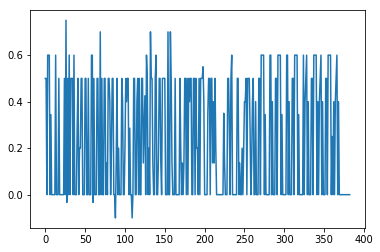

0.23145537810028669

In [7]:
plt.plot(money_temp_polarity)
plt.show()
np.mean(money_temp_polarity)

In [8]:
text_data

['despite amazon price cuts top',
 'despite amazon price cuts top',
 'time and money organicfarming organicfoodxe2x80xa6',
 'own lowest price finder app',
 'own lowest price finder app',
 'own lowest price finder app',
 'unitswk avg price 1185n2 heral',
 'e fast cheap easy or',
 'the cost of',
 'frankfu now cost 17100 xe2x82xac',
 'the grocery money organicfood holisticxe2x80xa6',
 'inc ngvc price target at',
 '90 day money ack satisfaction',
 'own lowest price finder app',
 'ut the cost eing a',
 'frugal save money and uy',
 'gardendifferent save money and grow',
 'tend to cost more than',
 'at est price in india',
 'at est price in india',
 'at est price in india',
 'at est price in india',
 'at est price in india',
 'foods nasdaqunfi price target to',
 'nhi more money forxe2x80xa6',
 'make money online responsive',
 'of pulic money after successfully',
 'social media money mental health',
 'nhi more money forxe2x80xa6',
 'finance leads money should go',
 'if you value your own',
 'a

In [10]:
tokenized_sents = []
tokenized_sents = [word_tokenize(i) for i in text_data]
adjective_adverb = []
for j in range(1,len(tokenized_sents)):
    tagged = nltk.pos_tag(tokenized_sents[j])
    for item in tagged:
        if item[1] == 'JJ' or item[1] == 'JJR' or item[1] == 'JJS' or item[1] == 'RBR' or item[1] == 'RB' or item[1]== 'RBS':
            adjective_adverb.append(item[0])

In [11]:
tokenized_sents

[['despite', 'amazon', 'price', 'cuts', 'top'],
 ['despite', 'amazon', 'price', 'cuts', 'top'],
 ['time', 'and', 'money', 'organicfarming', 'organicfoodxe2x80xa6'],
 ['own', 'lowest', 'price', 'finder', 'app'],
 ['own', 'lowest', 'price', 'finder', 'app'],
 ['own', 'lowest', 'price', 'finder', 'app'],
 ['unitswk', 'avg', 'price', '1185n2', 'heral'],
 ['e', 'fast', 'cheap', 'easy', 'or'],
 ['the', 'cost', 'of'],
 ['frankfu', 'now', 'cost', '17100', 'xe2x82xac'],
 ['the', 'grocery', 'money', 'organicfood', 'holisticxe2x80xa6'],
 ['inc', 'ngvc', 'price', 'target', 'at'],
 ['90', 'day', 'money', 'ack', 'satisfaction'],
 ['own', 'lowest', 'price', 'finder', 'app'],
 ['ut', 'the', 'cost', 'eing', 'a'],
 ['frugal', 'save', 'money', 'and', 'uy'],
 ['gardendifferent', 'save', 'money', 'and', 'grow'],
 ['tend', 'to', 'cost', 'more', 'than'],
 ['at', 'est', 'price', 'in', 'india'],
 ['at', 'est', 'price', 'in', 'india'],
 ['at', 'est', 'price', 'in', 'india'],
 ['at', 'est', 'price', 'in', 'india

In [12]:
from collections import Counter
x = Counter(adjective_adverb)
x.most_common()


[('more', 77),
 ('nhi', 51),
 ('own', 38),
 ('lowest', 32),
 ('cheap', 20),
 ('extra', 18),
 ('top', 13),
 ('doyle', 13),
 ('new', 13),
 ('amazon', 11),
 ('much', 10),
 ('truly', 7),
 ('enough', 6),
 ('unitswk', 5),
 ('avg', 5),
 ('est', 5),
 ('good', 5),
 ('right', 5),
 ('fast', 4),
 ('frankfu', 4),
 ('now', 4),
 ('ngvc', 4),
 ('not', 3),
 ('y', 3),
 ('just', 3),
 ('still', 3),
 ('ut', 3),
 ('organic', 3),
 ('social', 2),
 ('mental', 2),
 ('minimum', 2),
 ('free', 2),
 ('full', 2),
 ('verified', 2),
 ('huge', 2),
 ('xe2x80x93', 2),
 ('frugal', 1),
 ('nasdaqunfi', 1),
 ('pulic', 1),
 ('successfully', 1),
 ('always', 1),
 ('stuckinthedunya', 1),
 ('amp', 1),
 ('noffer', 1),
 ('high', 1),
 ('too', 1),
 ('additional', 1),
 ('medical', 1),
 ('effective', 1),
 ('national', 1),
 ('true', 1),
 ('txe2x80xa6', 1),
 ('economic', 1),
 ('natural', 1)]